In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = r"/content/forestfires.csv"

In [ ]:
data = pd.read_csv(path)

In [ ]:
X = data.drop('size_category', axis=1)
y = data['size_category']

In [ ]:
categorical_cols = ['month', 'day']
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [ ]:
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
svm = SVC()
svm.fit(X, y)

SVC()

In [ ]:
y_pred = svm.predict(X)

In [ ]:
accuracy = accuracy_score(y, y_pred)
confusion_mat = confusion_matrix(y, y_pred)

In [ ]:
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.9458413926499033
Confusion Matrix:
[[111  28]
 [  0 378]]


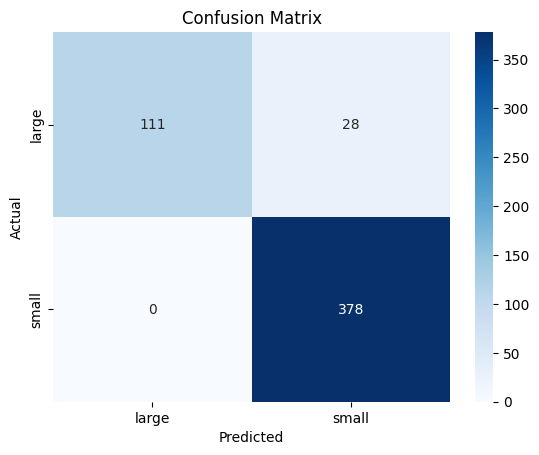

In [ ]:
labels = np.unique(y)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()